<a href="https://colab.research.google.com/github/psrl9/Projects/blob/main/Forecasting_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [3]:
import pandas as pd
import plotly.express as px
from prophet import Prophet


In [4]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'


## Importing the Dataset & Exploring it

In [6]:
df = pd.read_csv("AAPL.csv")

In [ ]:
#read_csv function from pandas


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-30,167.871506,172.250000,167.761002,171.078506,171.078506,63844000
1,2021-08-31,171.240005,173.628998,169.779495,173.539505,173.539505,87128000
2,2021-09-01,174.820007,176.350006,173.761993,173.949997,173.949997,72598000
3,2021-09-02,174.738007,175.598007,172.750000,173.156006,173.156006,58474000
4,2021-09-03,172.600006,174.133499,171.822006,173.902496,173.902496,51514000
...,...,...,...,...,...,...,...
248,2022-08-24,132.750000,135.470001,132.100006,133.800003,133.800003,38627000
249,2022-08-25,135.259995,137.419998,134.279999,137.279999,137.279999,37496300
250,2022-08-26,136.550003,137.830002,130.500000,130.750000,130.750000,53253100
251,2022-08-29,129.899994,131.949997,128.770004,129.789993,129.789993,48038200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,158.005555,160.019127,156.193531,158.193492,157.698789,8.818129e+07
std,12.667228,12.666275,12.539630,12.589829,12.559609,2.641432e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,148.302494,149.437500,146.515003,148.382499,147.797485,6.947065e+07
50%,158.875000,161.105003,156.150002,158.870002,158.315872,8.248645e+07
75%,169.232502,171.057503,167.220001,168.970005,168.630115,1.002058e+08
max,182.630005,182.940002,179.119995,182.009995,181.259933,1.954327e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [9]:
px.area(df, x="Date", y="Close")

In [10]:
px.line(df, x="Date", y="Close")

In [11]:
px.area(df, x="Date", y="Volume")

In [12]:
px.bar(df, x="Date", y="Volume")

In [13]:
px.box(df, y="Close")

## Data Preperation

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-30,149.000000,153.490005,148.610001,153.119995,152.266754,90956700
1,2021-08-31,152.660004,152.800003,151.289993,151.830002,150.983963,86453100
2,2021-09-01,152.830002,154.979996,152.339996,152.509995,151.660172,80313700
3,2021-09-02,153.869995,154.720001,152.399994,153.649994,152.793808,71115500
4,2021-09-03,153.759995,154.630005,153.089996,154.300003,153.440186,57808700
...,...,...,...,...,...,...,...
247,2022-08-23,167.080002,168.710007,166.649994,167.229996,167.229996,54147100
248,2022-08-24,167.320007,168.110001,166.250000,167.529999,167.529999,53841500
249,2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
250,2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500


In [15]:
columns = ['Date', 'Close'] 
ndf = pd.DataFrame(df, columns=columns) 

In [16]:
ndf

,Date,Close
0,2021-08-30,153.119995
1,2021-08-31,151.830002
2,2021-09-01,152.509995
3,2021-09-02,153.649994
4,2021-09-03,154.300003
...,...,...
247,2022-08-23,167.229996
248,2022-08-24,167.529999
249,2022-08-25,170.029999
250,2022-08-26,163.619995


In [17]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close': 'y'})

In [18]:
prophet_df

,ds,y
0,2021-08-30,153.119995
1,2021-08-31,151.830002
2,2021-09-01,152.509995
3,2021-09-02,153.649994
4,2021-09-03,154.300003
...,...,...
247,2022-08-23,167.229996
248,2022-08-24,167.529999
249,2022-08-25,170.029999
250,2022-08-26,163.619995


## Creating Facebook Prophet Model

In [19]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpprs1qsc3/7uo6wbyl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpprs1qsc3/5bjr4f4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80243', 'data', 'file=/tmp/tmpprs1qsc3/7uo6wbyl.json', 'init=/tmp/tmpprs1qsc3/5bjr4f4l.json', 'output', 'file=/tmp/tmp989crm0d/prophet_model-20220831172948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:29:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:29:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [20]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-30,150.036845,141.778362,155.962137,150.036845,150.036845,-0.988760,-0.988760,-0.988760,-0.988760,-0.988760,-0.988760,0.0,0.0,0.0,149.048085
1,2021-08-31,149.918223,142.927249,156.637170,149.918223,149.918223,-0.288205,-0.288205,-0.288205,-0.288205,-0.288205,-0.288205,0.0,0.0,0.0,149.630018
2,2021-09-01,149.799600,143.349070,156.740316,149.799600,149.799600,0.290674,0.290674,0.290674,0.290674,0.290674,0.290674,0.0,0.0,0.0,150.090274
3,2021-09-02,149.680978,141.927175,156.968584,149.680978,149.680978,-0.298167,-0.298167,-0.298167,-0.298167,-0.298167,-0.298167,0.0,0.0,0.0,149.382811
4,2021-09-03,149.562355,142.080916,155.389308,149.562355,149.562355,-0.675672,-0.675672,-0.675672,-0.675672,-0.675672,-0.675672,0.0,0.0,0.0,148.886684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-09-24,185.444571,179.271737,193.745891,182.992827,188.129091,0.980065,0.980065,0.980065,0.980065,0.980065,0.980065,0.0,0.0,0.0,186.424636
278,2022-09-25,185.923032,179.154382,194.646967,183.328053,188.772691,0.980065,0.980065,0.980065,0.980065,0.980065,0.980065,0.0,0.0,0.0,186.903097
279,2022-09-26,186.401492,178.419558,193.112093,183.649413,189.400802,-0.988760,-0.988760,-0.988760,-0.988760,-0.988760,-0.988760,0.0,0.0,0.0,185.412732
280,2022-09-27,186.879953,179.182847,194.063738,183.889368,190.057878,-0.288205,-0.288205,-0.288205,-0.288205,-0.288205,-0.288205,0.0,0.0,0.0,186.591748


In [22]:
px.line(forecast, x="ds", y='yhat')

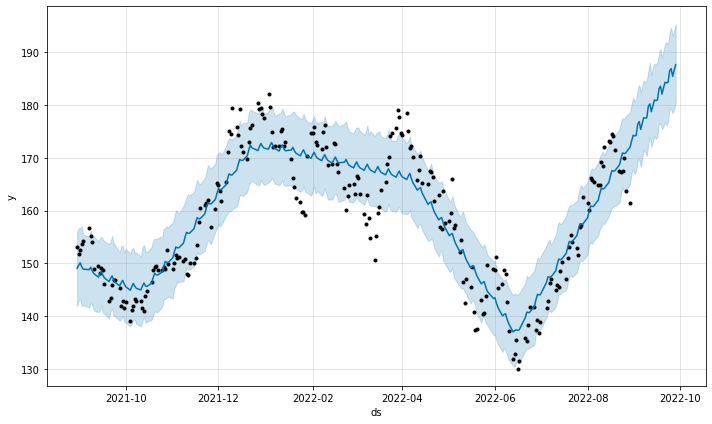

In [23]:
figure = m.plot(forecast, xlabel = 'ds', ylabel ='y')

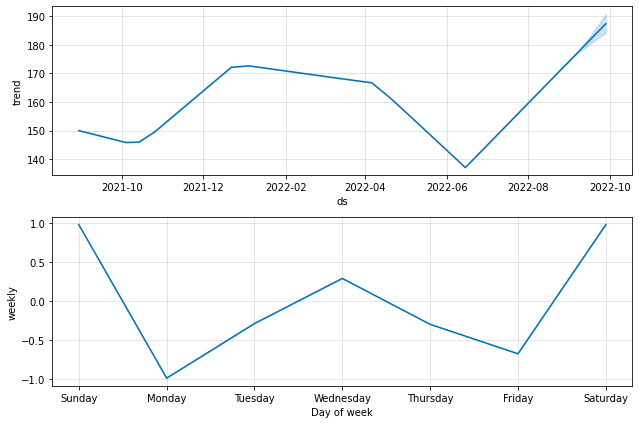

In [24]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [25]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
